<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
## Setup
# load libs/modules
%run "../utils/load_envz.ipynb"

In [2]:
# Load data set 
DATA_DIR = "../dataset"
DATA_FILE = "targeted_chv_support_ke-20180320.csv" 
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

In [3]:
## themes | variable - outcome mapping
argz_Units = ["CHP ID", "Households Registered"] 
argz_Ops = [ "Sales", "Community Events"]
argz_pregoz = [ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]
argz_U5_care = ["Total U5 Assessments", "Total U5 Treatments"]
argz_U1_care = ["Total U1 Assessments", "Total U1 Treatments"]
argz_malaria = [ "All Malaria Assessments", "All Malaria Treatments", "Act 6pack Issue", "mRDT Used", "%mRDT"]
argz_U5_diseases = ["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]

argz_EPMs = ["Households Registered", "Sales", "Community Events", "Total U5 Assessments", "Total U1 Assessments", "Pregnancy"]

## Additional Columns
dataset["Country"] = "KE"
#dataset["HHQuintiles"] = pd.qcut( dataset["Households Registered"], 5, labels=["HH_Quint_1", "HH_Quint_2", "HH_Quint_3", "HH_Quint_4", "HH_Quint_5"])
dnul = pd.Series( ["Households Registered"]).apply( lambda x: quintilize(dataset, x, labelzPrefix="HH_Quints" ) )
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
                                         np.where(dataset["Sales"] < 4080, "2040_to_4080", 
                                                 np.where(dataset["Sales"] < 6120, "4080_to_6120", 
                                                         np.where(dataset["Sales"] < 8160, "6120_to_8160", 
                                                                 np.where(dataset["Sales"] < 10200, "8160_to_10200", "Above_10K")))) ) 


In [4]:
# Sample structure 
sampleStructure(dataset, "Country") 
#pd.crosstab( dataset["Country"], dataset["Class_Sales_Levels"], margins=True)


CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP Sales   
Country                                                                     
KE        1493                148764        100.0  646630.0         433.0   

             Pregnancy                Community Events                 \
        # Pregoz Cases Avg.CHP Pregoz         # Events Avg.CHP Events   
Country                                                                 
KE                 695            0.0              722            0.0   

        All Malaria Assessments                 Total U5 Assessments  \
                # Malaria Cases Avg.CHP Malaria        # Child Cases   
Country                                                                
KE                         4987             3.0                 9600   

                   Total U1 Assessments             
        Avg.CHP U5           # U1 Cases Avg.CHP U1  
Country                                             
KE             6.0                 2195        1.0

In [5]:
summarizer(dataset)

,Phone Number,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,...,On Time Referral f/u Treatment U5,Missed Visits,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered
count,1.493000e+03,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,...,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00
mean,2.547525e+11,0.47,0.22,0.21,1.47,0.57,6.43,2.99,1.72,0.63,...,0.26,0.22,0.52,3.34,2.23,4.30,3.34,433.11,0.48,99.64
std,6.268657e+07,0.78,0.40,0.50,1.75,1.05,5.95,3.91,3.00,1.20,...,0.42,0.71,0.46,5.24,4.30,9.52,5.24,1199.99,1.07,48.08
min,2.547020e+11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2156.56,0.00,0.00
25%,2.547160e+11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.00
50%,2.547400e+11,0.00,0.00,0.00,1.00,0.00,6.00,2.00,0.00,0.00,...,0.00,0.00,0.60,1.00,0.00,0.00,1.00,0.00,0.00,100.00
75%,2.547960e+11,1.00,0.00,0.00,2.00,1.00,11.00,4.00,2.00,1.00,...,0.57,0.00,1.00,5.00,3.00,5.00,5.00,347.84,0.00,125.00
max,2.567110e+11,5.00,1.00,4.00,10.00,7.00,37.00,26.00,22.00,11.00,...,1.00,7.00,1.00,55.00,51.00,128.00,55.00,18032.34,9.00,356.00


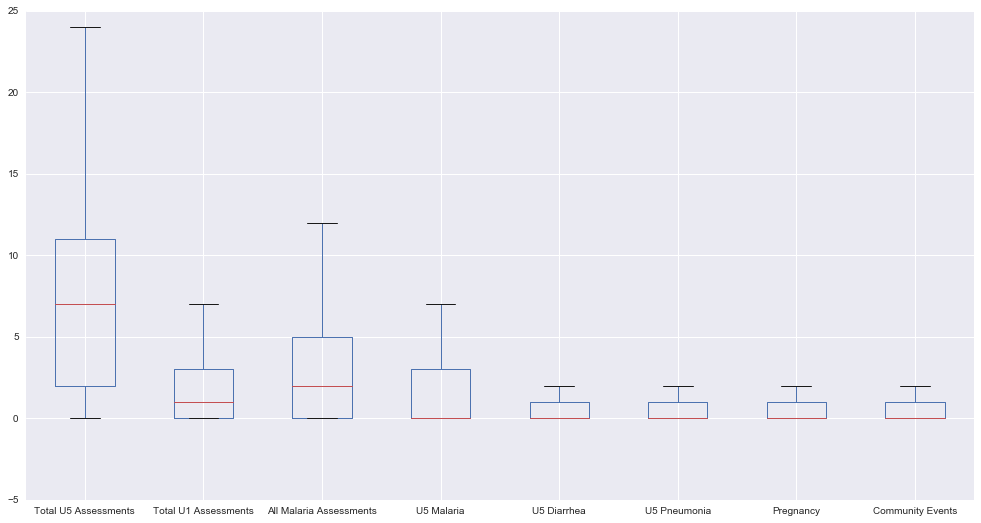

In [56]:
dataset[ ["Total U5 Assessments", "Total U1 Assessments", "All Malaria Assessments","U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Pregnancy", "Community Events"]].plot(kind="box", figsize=(17,9), ylim=(-5,25))

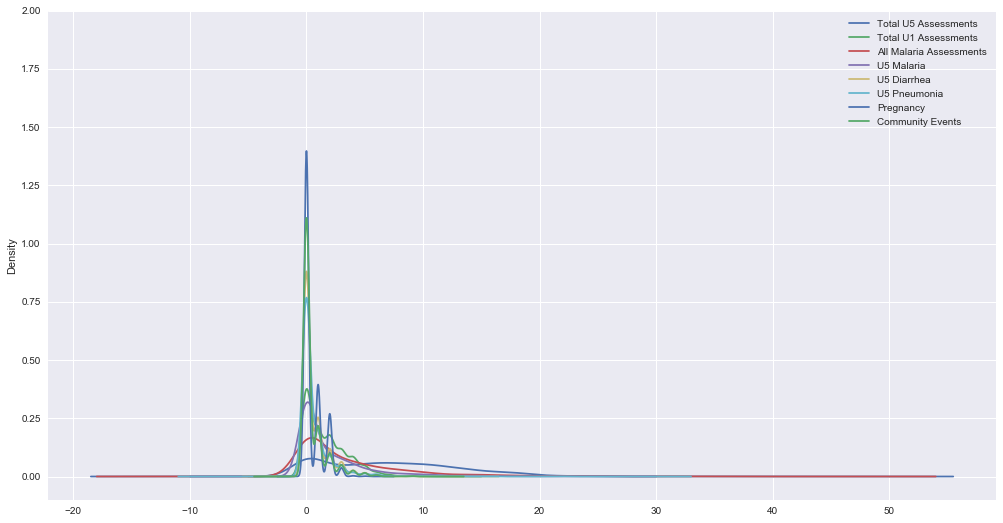

In [61]:
dataset[ ["Total U5 Assessments", "Total U1 Assessments", "All Malaria Assessments","U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Pregnancy", "Community Events"]].plot(kind="kde", figsize=(17,9), ylim=(-0.1,2))

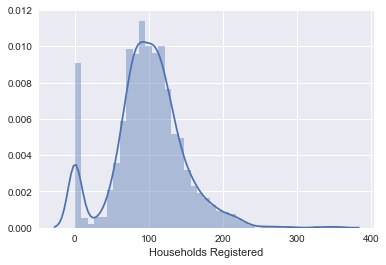

In [6]:
#checkMissing( dataset )
# outlier based on distribution of household registration 
sns.distplot( dataset["Households Registered"])

CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP Sales   
Country                                                                     
KE        1359                146495        108.0  642073.0         472.0   

             Pregnancy                Community Events                 \
        # Pregoz Cases Avg.CHP Pregoz         # Events Avg.CHP Events   
Country                                                                 
KE                 688            1.0              719            1.0   

        All Malaria Assessments                 Total U5 Assessments  \
                # Malaria Cases Avg.CHP Malaria        # Child Cases   
Country                                                                
KE                         4855             4.0                 9513   

                   Total U1 Assessments             
        Avg.CHP U5           # U1 Cases Avg.CHP U1  
Country                                             
KE               7                 2171        2.0

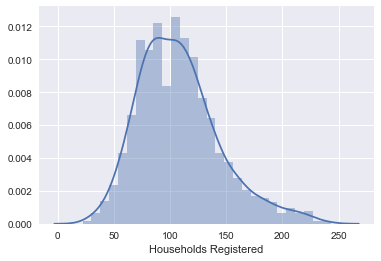

In [7]:
## Remove outliers
# updating dataset to HH > 20 and < 250 
dt_outliers = dataset[ (dataset["Households Registered"] < 20) | (dataset["Households Registered"] > 250) ]
dataset.drop( dt_outliers.index, inplace=True) #<< TODO: go back to boolean indexing

sns.distplot( dataset["Households Registered"]) 
sampleStructure(dataset, "Country") 


1. Correlation of the key KPIs


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.119,0.039,0.066,0.108,0.151
Sales,0.119,1.000,0.167,0.093,0.103,0.077
Community Events,0.039,0.167,1.000,0.339,0.321,0.104
Total U5 Assessments,0.066,0.093,0.339,1.000,0.758,0.260
Total U1 Assessments,0.108,0.103,0.321,0.758,1.000,0.292
Pregnancy,0.151,0.077,0.104,0.260,0.292,1.000


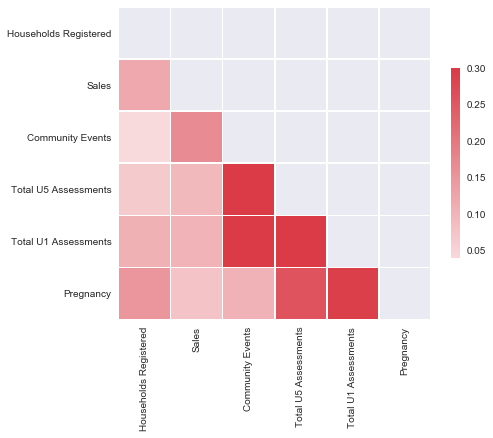

In [8]:
#plotCorrz( corrz(dataset, argz_EPMs) )
print("1. Correlation of the key KPIs")
cout = corrz(dataset, argz_EPMs)
cout
plotCorrz( cout )

In [9]:
## Malaria  
print( "2. Correlation within Malaria Variables")
cout1 = corrz(dataset, argz_malaria  )
cout1

2. Correlation within Malaria Variables


,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,%mRDT
All Malaria Assessments,1.000,0.926,0.882,1.000,0.563
All Malaria Treatments,0.926,1.000,0.951,0.926,0.473
Act 6pack Issue,0.882,0.951,1.000,0.882,0.411
mRDT Used,1.000,0.926,0.882,1.000,0.563
%mRDT,0.563,0.473,0.411,0.563,1.000


In [10]:
## All U5 Diseases
## Diseases 
print( "3. Correlation within U5 Diseases")
cout2 = corrz(dataset, argz_U5_diseases+["Total U5 Assessments", "On Time Referral f/u Treatment U5", "Total U1 Assessments"])
cout2

3. Correlation within U5 Diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U5 Assessments,On Time Referral f/u Treatment U5,Total U1 Assessments
U5 Malaria,1.000,0.144,0.074,0.518,0.181,0.365
U5 Diarrhea,0.144,1.000,0.214,0.350,0.213,0.296
U5 Pneumonia,0.074,0.214,1.000,0.322,0.256,0.278
Total U5 Assessments,0.518,0.350,0.322,1.000,0.368,0.758
On Time Referral f/u Treatment U5,0.181,0.213,0.256,0.368,1.000,0.390
Total U1 Assessments,0.365,0.296,0.278,0.758,0.390,1.000


4. Correlation within both U5 and U1 diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U5 Assessments,Total U5 Treatments,Total U1 Assessments,Total U1 Treatments
U5 Malaria,1.000,0.144,0.074,0.518,0.841,0.365,0.567
U5 Diarrhea,0.144,1.000,0.214,0.350,0.509,0.296,0.412
U5 Pneumonia,0.074,0.214,1.000,0.322,0.507,0.278,0.354
Total U5 Assessments,0.518,0.350,0.322,1.000,0.631,0.758,0.432
Total U5 Treatments,0.841,0.509,0.507,0.631,1.000,0.480,0.701
Total U1 Assessments,0.365,0.296,0.278,0.758,0.480,1.000,0.568
Total U1 Treatments,0.567,0.412,0.354,0.432,0.701,0.568,1.000


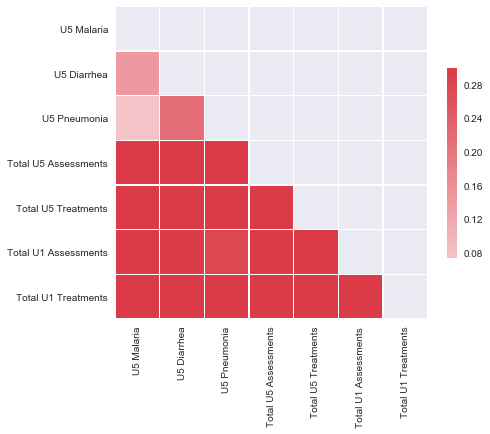

In [11]:
## All U5 Diseases + U1 
print( "4. Correlation within both U5 and U1 diseases")
cout3 = corrz(dataset, argz_U5_diseases+argz_U5_care+argz_U1_care)
cout3 
plotCorrz( cout3 )

In [12]:
sampleStructure(dataset, "Class_Sales_Levels") 


CHP ID Households Registered                  Sales  \
                   # CHPs                 # HHs Avg.CHP.Size KES Sales   
Class_Sales_Levels                                                       
2040_to_4080           65                  7979        123.0  196305.0   
4080_to_6120            7                   890        127.0   33332.0   
6120_to_8160            6                   753        126.0   43309.0   
8160_to_10200           3                   408        136.0   27935.0   
Above_10K               4                   447        112.0   55528.0   
Below_2040           1274                136018        107.0  285665.0   

                                      Pregnancy                 \
                   Avg.CHP Sales # Pregoz Cases Avg.CHP Pregoz   
Class_Sales_Levels                                               
2040_to_4080              3020.0             50            1.0   
4080_to_6120              4762.0              7            1.0   
6120_to_8160              7218.0              9            2.0   
8160_to_10200             9312.0              3            1.0   
Above_10K                13882.0              1            0.0   
Below_2040                 224.0            618            0.0   

                   Community Events                All Malaria Assessments  \
                           # Events Avg.CHP Events         # Malaria Cases   
Class_Sales_Levels                                                           
2040_to_4080                     60            1.0                     273   
4080_to_6120                      4            1.0                      11   
6120_to_8160                     12            2.0                       5   
8160_to_10200                     9            3.0                      13   
Above_10K                         5            1.0                       9   
Below_2040                      629            0.0                    4544   

                                   Total U5 Assessments             \
                   Avg.CHP Malaria        # Child Cases Avg.CHP U5   
Class_Sales_Levels                                                   
2040_to_4080                   4.0                  574        9.0   
4080_to_6120                   2.0                   36        5.0   
6120_to_8160                   1.0                   34        6.0   
8160_to_10200                  4.0                   53       18.0   
Above_10K                      2.0                   31        8.0   
Below_2040                     4.0                 8785        7.0   

                   Total U1 Assessments             
                             # U1 Cases Avg.CHP U1  
Class_Sales_Levels                                  
2040_to_4080                        149        2.0  
4080_to_6120                          8        1.0  
6120_to_8160                          9        2.0  
8160_to_10200                        13        4.0  
Above_10K                            10        2.0  
Below_2040                         1982        2.0

In [13]:
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
                                         np.where(dataset["Sales"] < 4080, "2040_to_4080",  "Above_4080"))

sampleStructure(dataset, "Class_Sales_Levels") 


CHP ID Households Registered                  Sales  \
                   # CHPs                 # HHs Avg.CHP.Size KES Sales   
Class_Sales_Levels                                                       
2040_to_4080           65                  7979        123.0  196305.0   
Above_4080             20                  2498        125.0  160103.0   
Below_2040           1274                136018        107.0  285665.0   

                                      Pregnancy                 \
                   Avg.CHP Sales # Pregoz Cases Avg.CHP Pregoz   
Class_Sales_Levels                                               
2040_to_4080              3020.0             50            1.0   
Above_4080                8005.0             20            1.0   
Below_2040                 224.0            618            0.0   

                   Community Events                All Malaria Assessments  \
                           # Events Avg.CHP Events         # Malaria Cases   
Class_Sales_Levels                                                           
2040_to_4080                     60            1.0                     273   
Above_4080                       30            2.0                      38   
Below_2040                      629            0.0                    4544   

                                   Total U5 Assessments             \
                   Avg.CHP Malaria        # Child Cases Avg.CHP U5   
Class_Sales_Levels                                                   
2040_to_4080                   4.0                  574        9.0   
Above_4080                     2.0                  154        8.0   
Below_2040                     4.0                 8785        7.0   

                   Total U1 Assessments             
                             # U1 Cases Avg.CHP U1  
Class_Sales_Levels                                  
2040_to_4080                        149        2.0  
Above_4080                           40        2.0  
Below_2040                         1982        2.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242D47B9940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000242D4C29828>]], dtype=object)

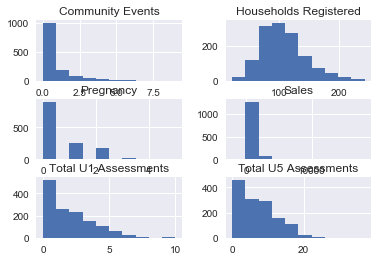

In [24]:
dataset[ argz_EPMs ].hist()

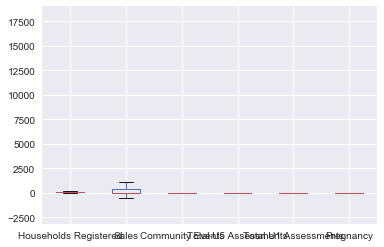

In [23]:
dataset[ argz_EPMs ].boxplot()

Class_Sales_Levels
2040_to_4080    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Above_4080      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Below_2040      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

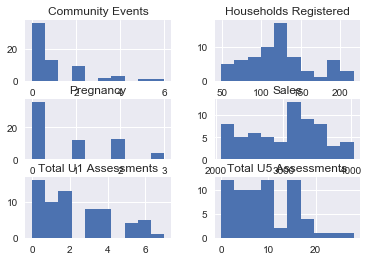

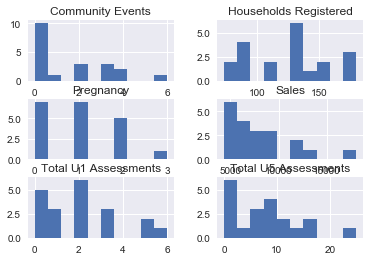

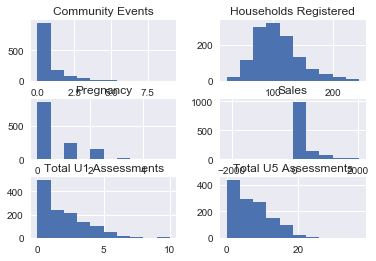

In [34]:
dataset[argz_EPMs+["Class_Sales_Levels"]].groupby("Class_Sales_Levels").hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242DA902710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000242DB1B90F0>]], dtype=object)

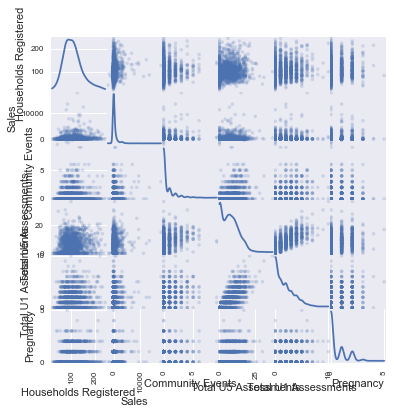

In [35]:
pd.plotting.scatter_matrix( dataset[ argz_EPMs ], alpha=0.2, figsize=(6,6), diagonal="kde")

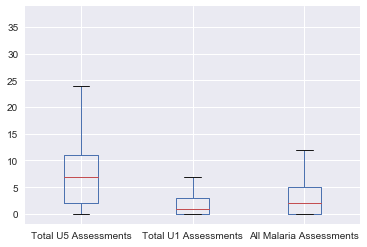

In [38]:
dataset[ ["Total U5 Assessments", "Total U1 Assessments", "All Malaria Assessments"]].boxplot()

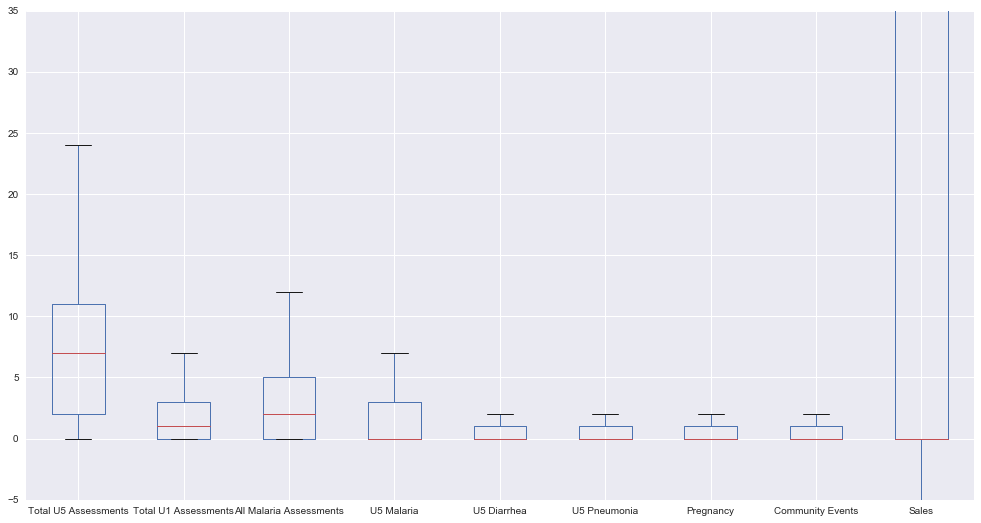

In [52]:
dataset[ ["Total U5 Assessments", "Total U1 Assessments", "All Malaria Assessments","U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Pregnancy", "Community Events", "Sales"]].plot(kind="box", figsize=(17,9), ylim=(-5,35))

In [ ]:
g = sns.FacetGrid( dataset )
g.box

1. Correlations for Sales Levels Between 2040 and 4080


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,-0.010,-0.211,-0.205,-0.119,0.309
Sales,-0.010,1.000,-0.026,-0.055,-0.137,0.005
Community Events,-0.211,-0.026,1.000,0.420,0.405,0.089
Total U5 Assessments,-0.205,-0.055,0.420,1.000,0.846,0.311
Total U1 Assessments,-0.119,-0.137,0.405,0.846,1.000,0.396
Pregnancy,0.309,0.005,0.089,0.311,0.396,1.000


1b. Visual for Correlations for Sales Levels Between  2040 and 4080


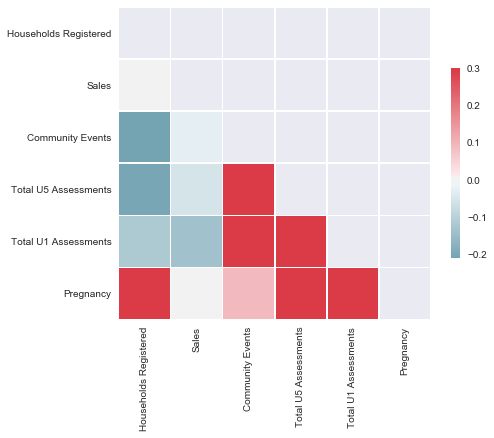

In [14]:
print( "1. Correlations for Sales Levels Between 2040 and 4080") 
c1=corrz(dataset[ dataset["Class_Sales_Levels"] == "2040_to_4080"], argz_EPMs, "spearman") 
c1

print( "1b. Visual for Correlations for Sales Levels Between  2040 and 4080")
plotCorrz(c1)

In [15]:

## TODO: lambda and crosstab
#pd.Series( dataset["Class_Sales_Levels"]).apply( lambda x: plotCorrz( corrz(dataset[ dataset["Class_Sales_Levels"] == x], argz_EPMs) )   )

print( "2. Correlations for Sales Levels Below 2040") 
corrz(dataset[ dataset["Class_Sales_Levels"] == "Below_2040"], argz_EPMs, "spearman") 
print( "3. Correlations for Sales Levels Above 4080") 
corrz(dataset[ dataset["Class_Sales_Levels"] == "Above_4080"], argz_EPMs, "spearman") 

2. Correlations for Sales Levels Below 2040


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.153,0.038,0.087,0.113,0.147
Sales,0.153,1.000,0.137,0.179,0.145,0.053
Community Events,0.038,0.137,1.000,0.370,0.324,0.115
Total U5 Assessments,0.087,0.179,0.370,1.000,0.786,0.290
Total U1 Assessments,0.113,0.145,0.324,0.786,1.000,0.299
Pregnancy,0.147,0.053,0.115,0.290,0.299,1.000


3. Correlations for Sales Levels Above 4080


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,-0.174,-0.034,0.142,0.050,0.325
Sales,-0.174,1.000,0.375,0.443,0.493,-0.195
Community Events,-0.034,0.375,1.000,0.573,0.590,0.104
Total U5 Assessments,0.142,0.443,0.573,1.000,0.920,0.286
Total U1 Assessments,0.050,0.493,0.590,0.920,1.000,0.109
Pregnancy,0.325,-0.195,0.104,0.286,0.109,1.000


In [21]:
dataset["Meets.Sales.Target"] = np.where( dataset["Sales"] < 2040, "Misses Target", "Meets Target")
#pd.get_dummies( dataset["Meets.Sales.Target"])
sampleStructure(dataset, "Meets.Sales.Target") 

CHP ID Households Registered                  Sales  \
                   # CHPs                 # HHs Avg.CHP.Size KES Sales   
Meets.Sales.Target                                                       
Meets Target           85                 10477        123.0  356408.0   
Misses Target        1274                136018        107.0  285665.0   

                                      Pregnancy                 \
                   Avg.CHP Sales # Pregoz Cases Avg.CHP Pregoz   
Meets.Sales.Target                                               
Meets Target              4193.0             70            1.0   
Misses Target              224.0            618            0.0   

                   Community Events                All Malaria Assessments  \
                           # Events Avg.CHP Events         # Malaria Cases   
Meets.Sales.Target                                                           
Meets Target                     90            1.0                     311   
Misses Target                   629            0.0                    4544   

                                   Total U5 Assessments             \
                   Avg.CHP Malaria        # Child Cases Avg.CHP U5   
Meets.Sales.Target                                                   
Meets Target                   4.0                  728        9.0   
Misses Target                  4.0                 8785        7.0   

                   Total U1 Assessments             
                             # U1 Cases Avg.CHP U1  
Meets.Sales.Target                                  
Meets Target                        189        2.0  
Misses Target                      1982        2.0

1. Correlations for Sales Levels Meets Targets


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.024,-0.144,-0.123,-0.073,0.316
Sales,0.024,1.000,0.097,-0.072,-0.093,0.088
Community Events,-0.144,0.097,1.000,0.452,0.441,0.113
Total U5 Assessments,-0.123,-0.072,0.452,1.000,0.860,0.289
Total U1 Assessments,-0.073,-0.093,0.441,0.860,1.000,0.332
Pregnancy,0.316,0.088,0.113,0.289,0.332,1.000


1b. Visual for Correlations for Sales Levels Between  Meets Target


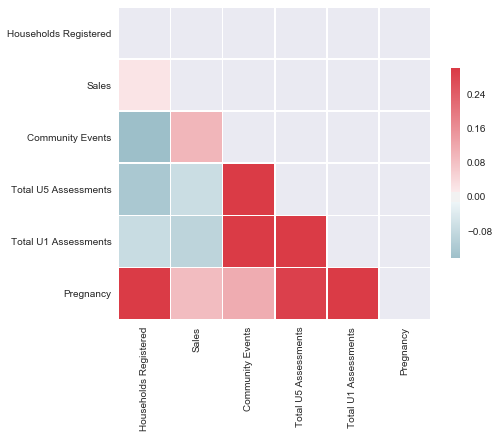

In [22]:
print( "1. Correlations for Sales Levels Meets Targets") 
c1=corrz(dataset[ dataset["Meets.Sales.Target"] == "Meets Target"], argz_EPMs, "spearman") 
c1

print( "1b. Visual for Correlations for Sales Levels Between  Meets Target")
plotCorrz(c1)

In [16]:
sampleStructure(dataset, "Quints_Households Registered") 

CHP ID Households Registered               \
                             # CHPs                 # HHs Avg.CHP.Size   
Quints_Households Registered                                             
HH_Quints_1                     179                 10327         58.0   
HH_Quints_2                     295                 23769         81.0   
HH_Quints_3                     304                 30401        100.0   
HH_Quints_4                     289                 34700        120.0   
HH_Quints_5                     292                 47298        162.0   

                                 Sales                    Pregnancy  \
                             KES Sales Avg.CHP Sales # Pregoz Cases   
Quints_Households Registered                                          
HH_Quints_1                    40203.0         225.0             43   
HH_Quints_2                   111998.0         380.0            154   
HH_Quints_3                   101063.0         332.0            147   
HH_Quints_4                   193636.0         670.0            138   
HH_Quints_5                   195173.0         668.0            206   

                                            Community Events                 \
                             Avg.CHP Pregoz         # Events Avg.CHP Events   
Quints_Households Registered                                                  
HH_Quints_1                             0.0               67            0.0   
HH_Quints_2                             1.0              130            0.0   
HH_Quints_3                             0.0              182            1.0   
HH_Quints_4                             0.0              192            1.0   
HH_Quints_5                             1.0              148            1.0   

                             All Malaria Assessments                  \
                                     # Malaria Cases Avg.CHP Malaria   
Quints_Households Registered                                           
HH_Quints_1                                      421             2.0   
HH_Quints_2                                     1051             4.0   
HH_Quints_3                                     1056             3.0   
HH_Quints_4                                     1086             4.0   
HH_Quints_5                                     1241             4.0   

                             Total U5 Assessments             \
                                    # Child Cases Avg.CHP U5   
Quints_Households Registered                                   
HH_Quints_1                                   918        5.0   
HH_Quints_2                                  2233        8.0   
HH_Quints_3                                  2183        7.0   
HH_Quints_4                                  2041        7.0   
HH_Quints_5                                  2138        7.0   

                             Total U1 Assessments             
                                       # U1 Cases Avg.CHP U1  
Quints_Households Registered                                  
HH_Quints_1                                   209        1.0  
HH_Quints_2                                   453        2.0  
HH_Quints_3                                   480        2.0  
HH_Quints_4                                   498        2.0  
HH_Quints_5                                   531        2.0